In [328]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [329]:
ridefile = pd.read_csv("/Users/alex/Desktop/02-Homework/05-Matplotlib/Instructions/Pyber/raw_data/ride_data.csv")
cityfile = pd.read_csv("/Users/alex/Desktop/02-Homework/05-Matplotlib/Instructions/Pyber/raw_data/city_data.csv")

In [330]:
ridedata = pd.merge(ridefile, cityfile, on='city')
#ridedata = pd.merge(ridefile, cityfile, how='left', on='city')
ridedata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [331]:
#Group merged files while retaining city, type, driver_count values. Get the mean of fair and count of rides. 

citygroup = ridedata.groupby(['city','type', 'driver_count'], as_index=False).agg({'fare' : 'mean', 'ride_id' : 'count'})
citygroup.head()

,city,type,driver_count,fare,ride_id
0,Amandaburgh,Urban,12,24.641667,18
1,Barajasview,Urban,26,25.332273,22
2,Barronchester,Suburban,11,36.422500,16
3,Bethanyland,Suburban,22,32.956111,18
4,Bradshawfurt,Rural,7,40.064000,10


<IPython.core.display.Javascript object>


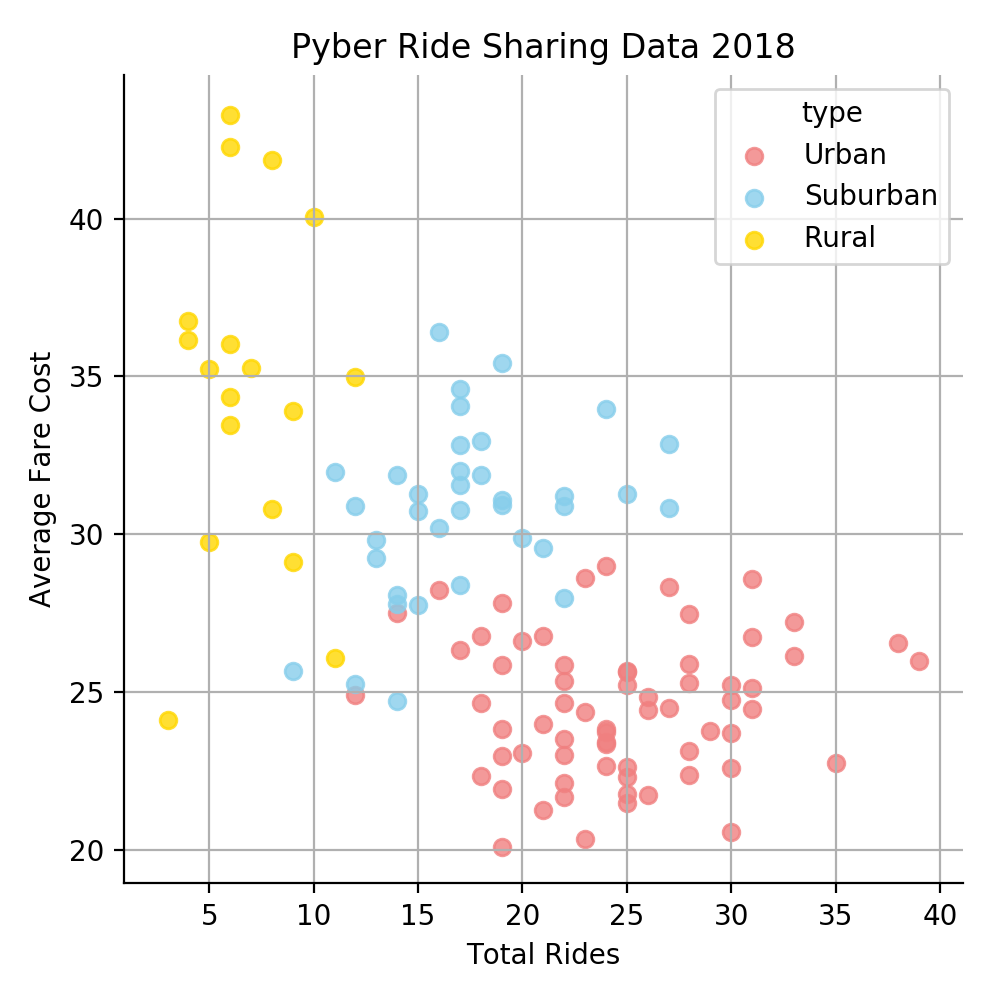

In [332]:
#plt.figure(1)
sns.lmplot(x='ride_id', y='fare', data=citygroup, palette=['lightcoral', 'skyblue','gold'], fit_reg=False, hue='type', legend_out=False)
plt.title("Pyber Ride Sharing Data 2018")
plt.xlabel('Total Rides')
plt.ylabel('Average Fare Cost')
plt.tight_layout()
plt.grid()

In [333]:
#Group by city, getting the average fares, total rides, and number of drivers

citytype = ridedata.groupby(['type'], as_index=False).agg({'fare' : 'sum', 
                                                           'ride_id' : 'count',
                                                           'driver_count' : 'sum'})

citytype

,type,fare,ride_id,driver_count
0,Rural,4327.93,125,537
1,Suburban,19356.33,625,8570
2,Urban,39854.38,1625,59602


<IPython.core.display.Javascript object>


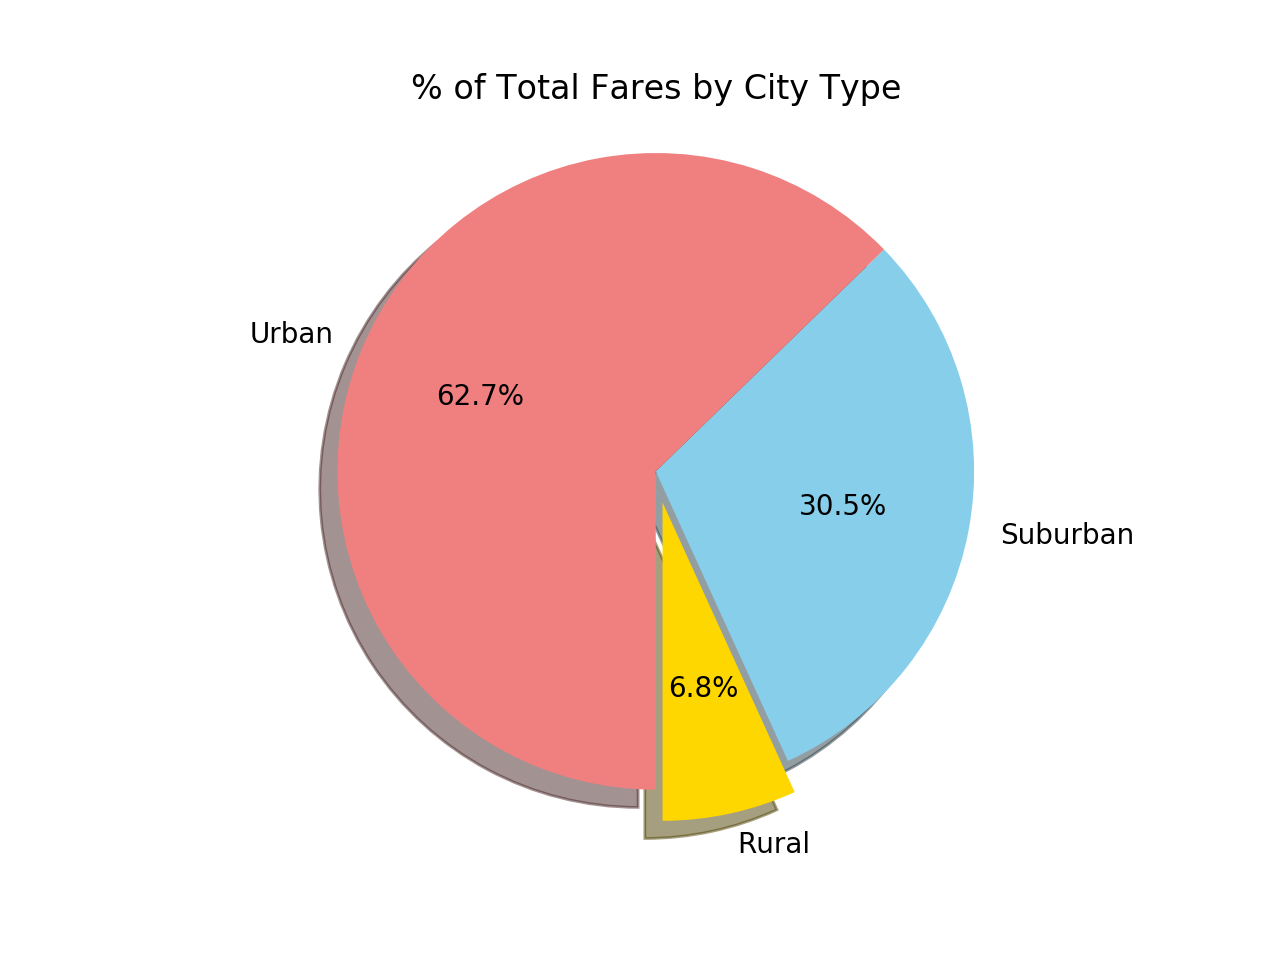

In [334]:

labels = citytype['type']
colors = ['gold', 'skyblue','lightcoral']
explode1 = (0.1,0,0)
fig1, ax1 = plt.subplots()

ax1.pie(citytype['fare'], explode=explode1, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)

ax1.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show()

<IPython.core.display.Javascript object>


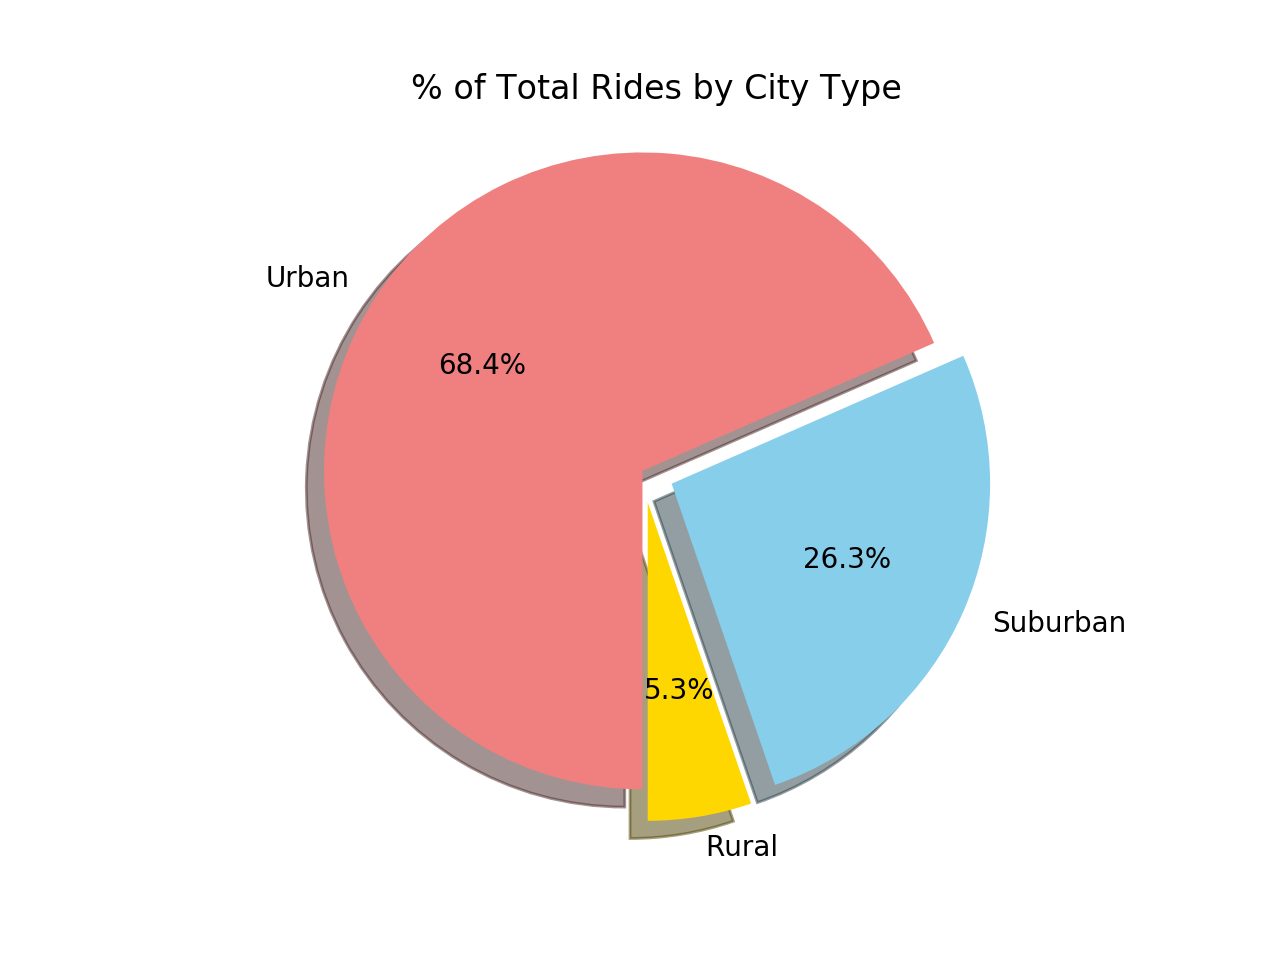

In [335]:
fig2, ax2 = plt.subplots() 

explode2 = (.1,.1,0)
ax2.pie(citytype['ride_id'], explode=explode2, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)
ax2.axis('equal')
plt.title('% of Total Rides by City Type')
plt.show()

<IPython.core.display.Javascript object>


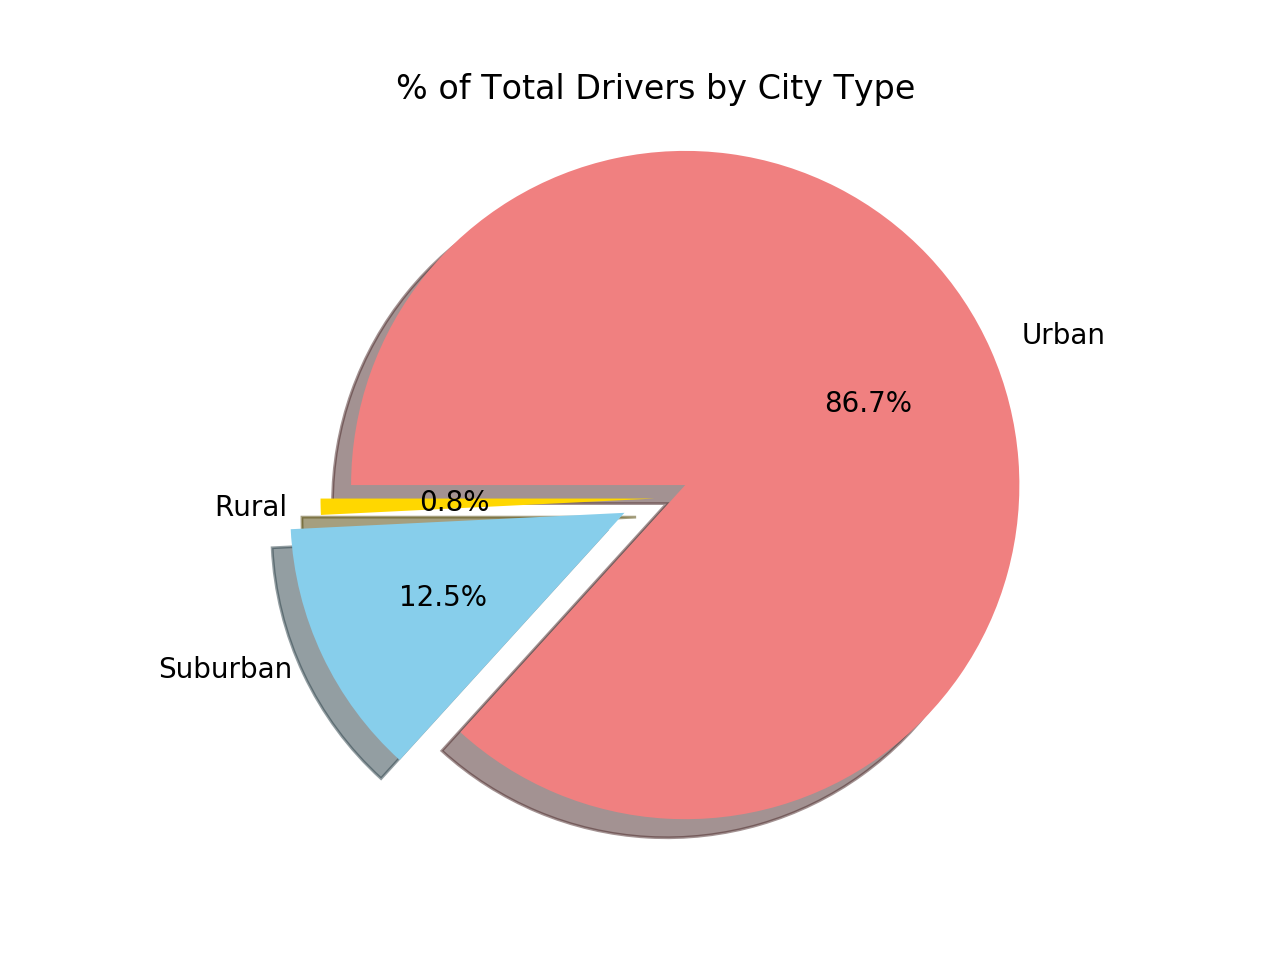

In [336]:
fig3, ax3 = plt.subplots() 

explode3 = (0, .1, .1)
ax3.pie(citytype['driver_count'], explode=explode3, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
ax3.axis('equal')
plt.title('% of Total Drivers by City Type')
plt.show()